In [50]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [51]:
df = pd.read_csv("../data/iris_dirty.csv")
df

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,NaN,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,virginica
146,147,6.3,2.5,5.0,1.9,virginica
147,148,6.5,3.0,5.2,2.0,virginica
148,149,6.2,3.4,5.4,2.3,virginica


In [52]:
complete_values = len(df.dropna())

complete_values_percent = complete_values/len(df)*100

print(f'total {complete_values_percent:.2f}% are complete')


total 87.33% are complete


In [53]:
df.fillna(np.nan, inplace=True)

In [54]:
def validate_data(row):
  # Species check
  if row["Species"].lower() not in ["setosa", "versicolor", "virginica"]:
    return False
  
  # Measurement positivity
  if any(val <= 0 for val in [row["Sepal.Length"], row["Sepal.Width"], row["Petal.Length"], row["Petal.Width"]]):
    return False
  
  # Petal length vs width ratio
  if row["Petal.Length"] < 2 * row["Petal.Width"]:
    return False
  
  # Sepal length limit
  if row["Sepal.Length"] > 30:
    return False
  
  # Sepal vs petal length
  if row["Sepal.Length"] < row["Petal.Length"] + row["Petal.Width"]:
    return False
  
  return True

# Apply validation function and filter invalid rows
filtered_data = df[df.apply(validate_data, axis=1)]
filtered_data

,Unnamed: 0,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,1,5.1,3.5,1.4,0.2,Setosa
1,2,4.9,3.0,1.4,0.2,setosa
2,3,4.7,3.2,1.3,0.2,setosa
3,4,4.6,3.1,1.5,0.2,setosa
4,5,NaN,3.6,1.4,0.2,setosa
...,...,...,...,...,...,...
99,100,5.7,2.8,4.1,1.3,versicolor
139,140,NaN,3.1,5.4,2.1,virginica
142,143,NaN,2.7,5.1,1.9,virginica
144,145,NaN,3.3,5.7,2.5,virginica


In [55]:
# Count rule violations using list comprehension
violations = [i for i, row in df.iterrows() if not validate_data(row)]

rule_counts = {
    "species rule" : 0,
    "positive measurement" : 0,
    "petal length vs width ratio" : 0,
    "sepal length limit" : 0,
    "sepal vs petal length" : 0,
}
for violation in violations:
    row = df.loc[violation]

    # species rule
    if row["Species"].lower() not in ["setosa", "versicolor", "virginica"]:
        rule_counts['Species'] += 1
    
    # Measurement positivity
    if any(val <= 0 for val in [row["Sepal.Length"], row["Sepal.Width"], row["Petal.Length"], row["Petal.Width"]]):
        rule_counts['positive measurement'] += 1
    
    # Petal length vs width ratio
    if row["Petal.Length"] < 2 * row["Petal.Width"]:
        rule_counts['petal length vs width ratio'] += 1
    
    # Sepal length limit
    if row["Sepal.Length"] > 30:
        rule_counts['sepal length limit'] += 1
    
    # Sepal vs petal length
    if row["Sepal.Length"] < row["Petal.Length"] + row["Petal.Width"]:
       rule_counts['sepal vs petal length'] += 1

# Print rule violations summary
for rule, count in rule_counts.items():
  print(f"Rule '{rule}': {count} violations")



Rule 'species rule': 0 violations
Rule 'positive measurement': 0 violations
Rule 'petal length vs width ratio': 0 violations
Rule 'sepal length limit': 0 violations
Rule 'sepal vs petal length': 56 violations


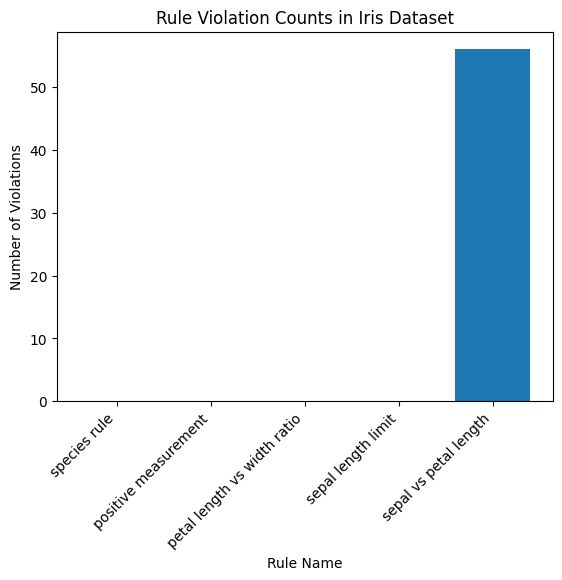

In [56]:
rule_names = list(rule_counts.keys())
violation_counts = list(rule_counts.values())

# Create a bar chart
plt.bar(rule_names, violation_counts)

# Add labels and title
plt.xlabel("Rule Name")
plt.ylabel("Number of Violations")
plt.title("Rule Violation Counts in Iris Dataset")

# Rotate x-axis labels for better readability if there are many rules
plt.xticks(rotation=45, ha='right')  # Optional: Rotate x-axis labels

# Display the plot
plt.show()

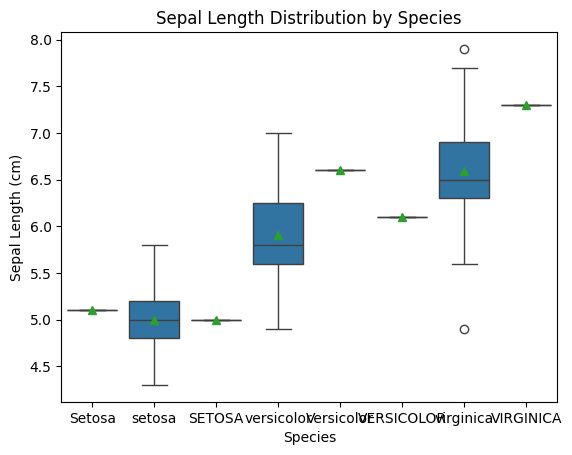

In [57]:
# Assuming your data is in a pandas DataFrame named 'df'
sns.boxplot(
    x = "Species",
    y = "Sepal.Length",
    showmeans=True,  # Optional: Show mean as a diamond
    data=df
)

# Customize the plot (optional)
plt.title("Sepal Length Distribution by Species")
plt.ylabel("Sepal Length (cm)")
plt.show()